<font size = 12>
<font color = 'blue'>

Métodos Matemáticos Computacionales 
    

Hernández Lozano Juan Pablo

# Método de Diferencias Finitas


In [1]:
import numpy as np
import matplotlib.pyplot as plt

La función a continuación crea el mallado inicial para el método de diferencias finitas. En este mallado se especifíca el tamaño $a=(n,m)$ del arreglo y también los valores de las diferentes fronteras de nuestro mallado. Como se tienen 4 fronteras, esta función regresa un arreglo de $(n+2,m+2)$

In [66]:
def crearMalla(a,top,left,bottom, right):
    n = a[0]
    m = a[1]
    malla = np.zeros((n+2,m+2))              #creamos el arreglo
    for i in range(1,n+1):                   #llenamos los lados izquierdo y derecho
        malla[i][0] = left[i-1]
        malla[i][m+1] = right[i-1]
    for i in range(1,m+1):                   #llenamos lso lados de arriba y abajo
        malla[0][i] = top[i-1]
        malla[n+1][i] = bottom[i-1]

    malla[0][m+1] = (malla[0][m]+malla[1][m+1])/2
    malla[n+1][0] = (malla[n][0]+malla[n+1][1])/2
    malla[0][0] = (malla[0][1]+malla[1][0])/2
    malla[n+1][m+1] = (malla[n+1][m]+malla[n][m+1])/2
    return malla

A continuacón damos un mallado específico basado en el problema del libro. Observamos que la sección del mallado que nos interesa resolver está dada por una submatriz de ceros. Podría establecerse una semilla inicial que sustituya a esta matriz pero la matriz de ceros funciona bien si no se tiene una buena intuición de cuál podría ser la mejor semilla. 

In [67]:
top = np.array([0.,2.5,5.,7.5,10.,12.5,15.])
left = np.array([0.,2.5,5.,7.5,10.])
bottom = top
right = left
print(len(top))
print(crearMalla((5,7),top,left,bottom,right))

7
[[ 0.   0.   2.5  5.   7.5 10.  12.5 15.   7.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 2.5  0.   0.   0.   0.   0.   0.   0.   2.5]
 [ 5.   0.   0.   0.   0.   0.   0.   0.   5. ]
 [ 7.5  0.   0.   0.   0.   0.   0.   0.   7.5]
 [10.   0.   0.   0.   0.   0.   0.   0.  10. ]
 [ 5.   0.   2.5  5.   7.5 10.  12.5 15.  12.5]]


A continuación se presenta la función que resuelve el problema. El criterio de paro podría ser el que todas las entradas de la matriz difieran por un error específico con la matriz de la iteración anterior. Sin embargo por simplicidad en este código se establece un número de iteraciones como criterior de paro.

In [3]:
def diferenciasFinitas(a,top,left,bottom, right, iteraciones):
    n = a[0]
    m = a[1]
    malla = crearMalla((n,m),top,left,bottom,right)
    for i in range(iteraciones):
        for i in range(1,n+1):
            for j in range(1,m+1):
                malla[i][j] = (malla[i-1][j]+malla[i][j-1]+malla[i][j+1]+malla[i+1][j])/4
    return malla 

Observamos la solución a nuestro problema:

In [68]:
mapCalor1 = diferenciasFinitas((5,7),top,left,bottom,right,1000)
mapCalor1

array([[ 0.        ,  0.        ,  2.5       ,  5.        ,  7.5       ,
        10.        , 12.5       , 15.        ,  7.5       ],
       [ 0.        ,  1.68867424,  3.43421641,  5.21798569,  6.93228937,
         8.34900416,  8.97177164,  7.51200039,  0.        ],
       [ 2.5       ,  3.32048054,  4.33020571,  5.50543699,  6.66216763,
         7.49195562,  7.526082  ,  6.07622994,  2.5       ],
       [ 5.        ,  4.76304219,  5.06068891,  5.81138892,  6.71898854,
         7.4305687 ,  7.5643708 ,  6.76683737,  5.        ],
       [ 7.5       ,  5.67099933,  5.33811883,  5.96044123,  6.9718289 ,
         7.94695986,  8.53399512,  8.42674873,  7.5       ],
       [10.        ,  5.08283629,  4.66034585,  5.72042826,  7.26092597,
         8.85144673, 10.19790107, 10.90616245, 10.        ],
       [ 5.        ,  0.        ,  2.5       ,  5.        ,  7.5       ,
        10.        , 12.5       , 15.        , 12.5       ]])

También podemos dar una representación visual de la solución en la cual los puntos más cercanos al blanco representan los puntos más calientes.

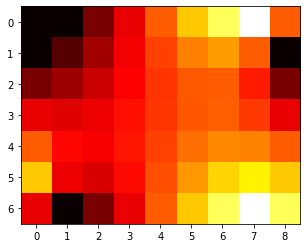

In [70]:
plt.imshow(mapCalor1, cmap='hot', interpolation='nearest')
plt.show()

In [7]:
top = np.array([100.,100.,100.,100.,100.])
left = np.array([75.,75.,75.,75.,75.])
bottom = np.array([0.,0.,0.,0.,0.])
right = np.array([50.,50.,50.,50.,50.])
print(crearMalla((5,5),top,left,bottom,right))

[[  0. 100. 100. 100. 100. 100.   0.]
 [ 75.   0.   0.   0.   0.   0.  50.]
 [ 75.   0.   0.   0.   0.   0.  50.]
 [ 75.   0.   0.   0.   0.   0.  50.]
 [ 75.   0.   0.   0.   0.   0.  50.]
 [ 75.   0.   0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.   0.   0.   0.]]


In [71]:
map2 = diferenciasFinitas((5,5),top,left,bottom,right,1000)

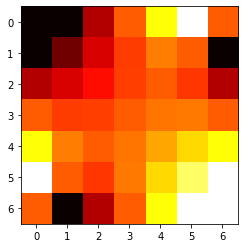

In [72]:
plt.imshow(map2, cmap='hot', interpolation='nearest')
plt.show()

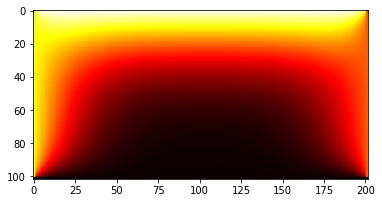

In [10]:
top = [100.]*200
left = [75.]*100
right = [50]*100
bottom = [0.]*200
map2 = diferenciasFinitas((100,200),top,left,bottom,right,1000)
plt.imshow(map2, cmap='hot', interpolation='nearest')
plt.show()

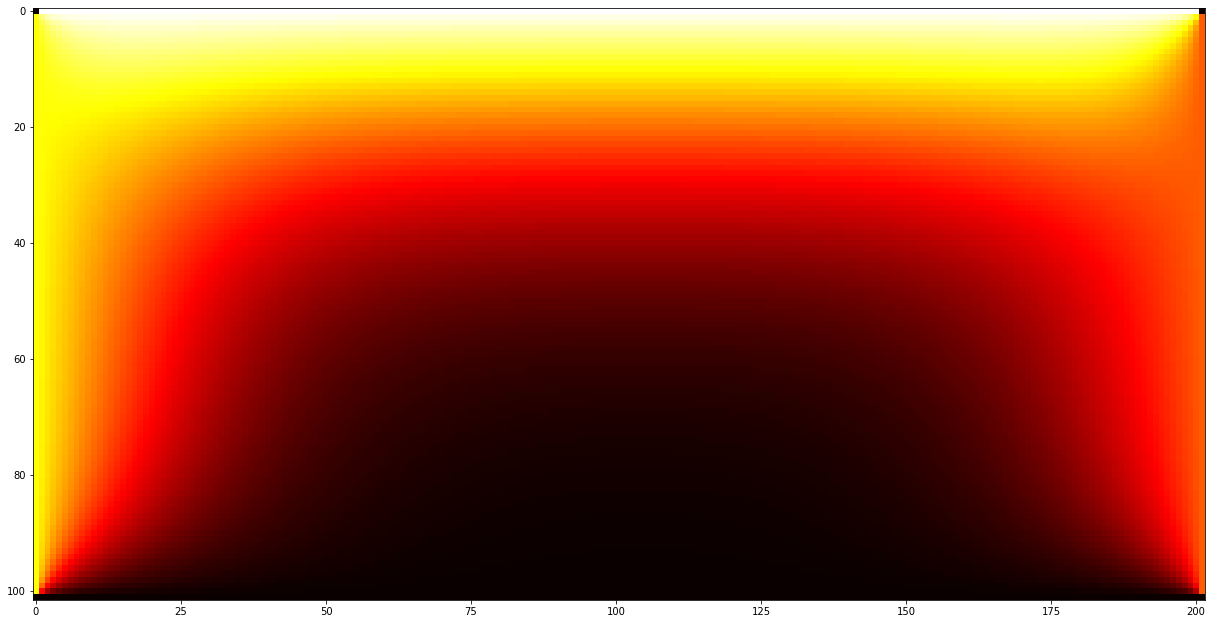

In [11]:
plt.figure(figsize=(21,40))
plt.imshow(map2, cmap='hot', interpolation='nearest')
plt.show()

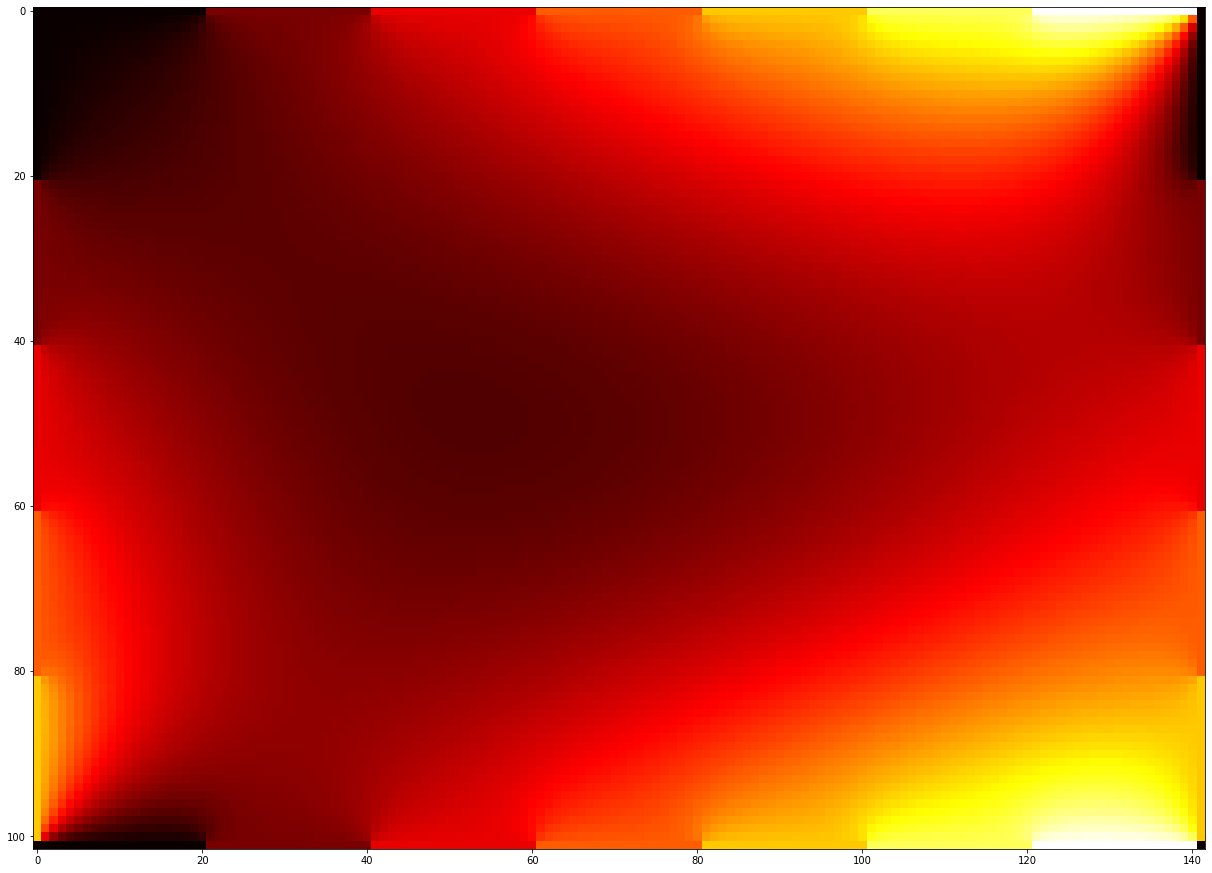

In [40]:
top = [0]*20 + [2.5]*20 + [5.0]*20+ [7.5]*20 + [10.0]*20 + [12.5]*20 + [15.0]*20
bottom = top
left = [0]*20 + [2.5]*20 + [5.0]*20+ [7.5]*20 + [10.0]*20 
right = left
map2 = diferenciasFinitas((100,140),top,left,bottom,right,1000)
plt.figure(figsize=(21,40))
plt.imshow(map2, cmap='hot', interpolation='nearest')
plt.show()

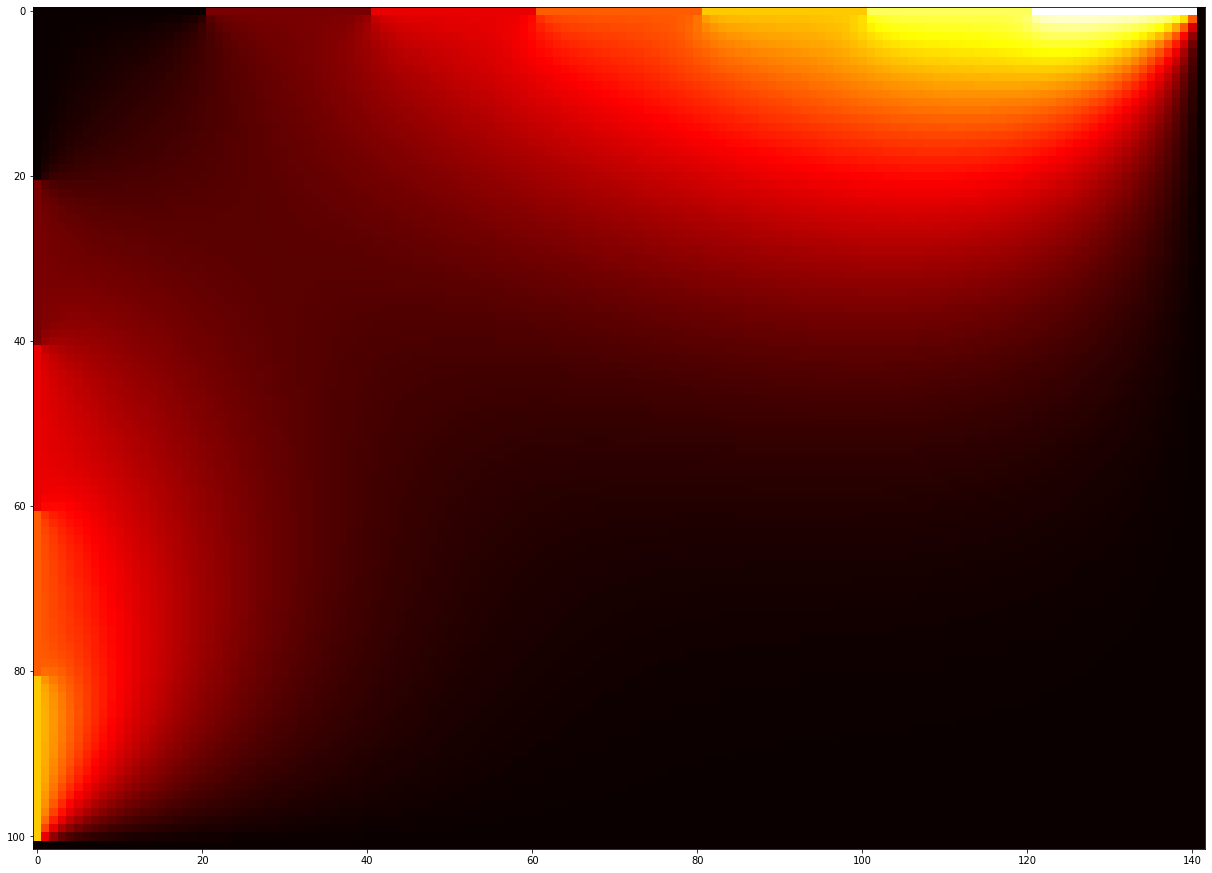

In [12]:
top = [0]*20 + [2.5]*20 + [5.0]*20+ [7.5]*20 + [10.0]*20 + [12.5]*20 + [15.0]*20
bottom = [0]*140
left = [0]*20 + [2.5]*20 + [5.0]*20+ [7.5]*20 + [10.0]*20 
right = [0]*100
map2 = diferenciasFinitas((100,140),top,left,bottom,right,1000)
plt.figure(figsize=(21,40))
plt.imshow(map2, cmap='hot', interpolation='nearest')
plt.show()

# Problema del exámen:

Paredes: 

- x = 0, T = 100y .......................                  Frontera izquierda
- x = 3, T = 250y .......................                  Frontera derecha
- y = 0, T = 0 ..........................                   Frontera inferior
- y = 2, T = 200 + (100/3)$x^2$.............     Frontera superior


In [34]:
left = []
right = []
for i in range(0,200+1):
    left.append(i)
    right.append(i*2.5)

print(left)
print(right)
print(len(left), len(right))
bottom = []
up  = []
for i in range(0,300+1):
    up.append(200. + (100./3)*(i*0.01)**2) 
    bottom.append(0.)

print(up)
print(len(up), len(bottom))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
[0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5,

In [35]:
left.reverse()
right.reverse()

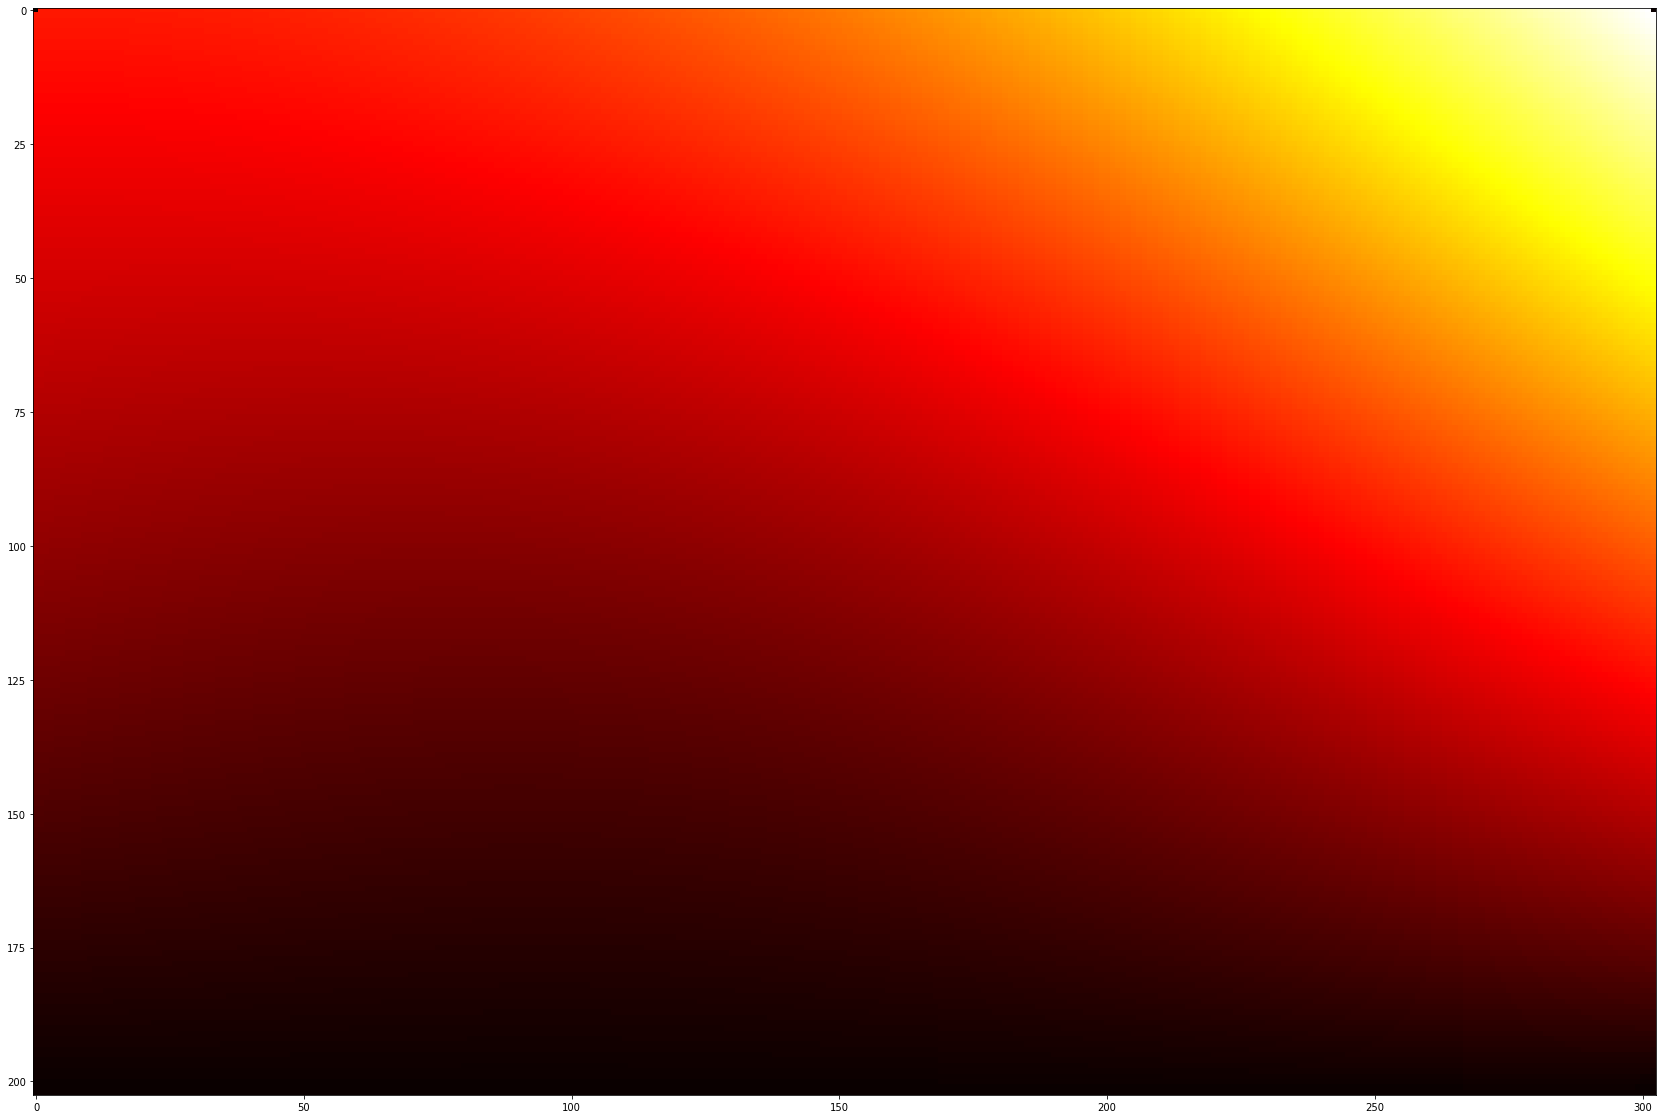

In [40]:
mapCalor = diferenciasFinitas((201,301),up,left,bottom,right,10000)
plt.figure(figsize=(30,20))
plt.imshow(mapCalor, cmap='hot')
plt.show()

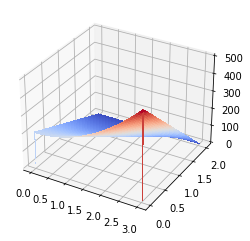

In [65]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 3.03, 0.01)
Y = np.arange(0, 2.03, 0.01)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, mapCalor, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [55]:
mapCalor.shape

(203, 303)

In [31]:
left = []
right = []
for i in range(0,20+1):
    left.append(i*10)
    right.append(i*25)

bottom = []
up  = []
for i in range(0,30+1):
    up.append(200. + (100./3)*(i*0.1)**2) 
    bottom.append(0.)

print(up)
#print(len(up), len(bottom))

print(left)
print(right)
#print(len(left), len(right))

[200.0, 200.33333333333334, 201.33333333333334, 203.0, 205.33333333333334, 208.33333333333334, 212.0, 216.33333333333334, 221.33333333333334, 227.0, 233.33333333333334, 240.33333333333334, 248.0, 256.33333333333337, 265.33333333333337, 275.0, 285.33333333333337, 296.33333333333337, 308.0, 320.33333333333337, 333.33333333333337, 347.0, 361.33333333333337, 376.33333333333337, 392.00000000000006, 408.33333333333337, 425.33333333333337, 443.00000000000006, 461.3333333333334, 480.3333333333334, 500.0]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]


In [32]:
left.reverse()
right.reverse()

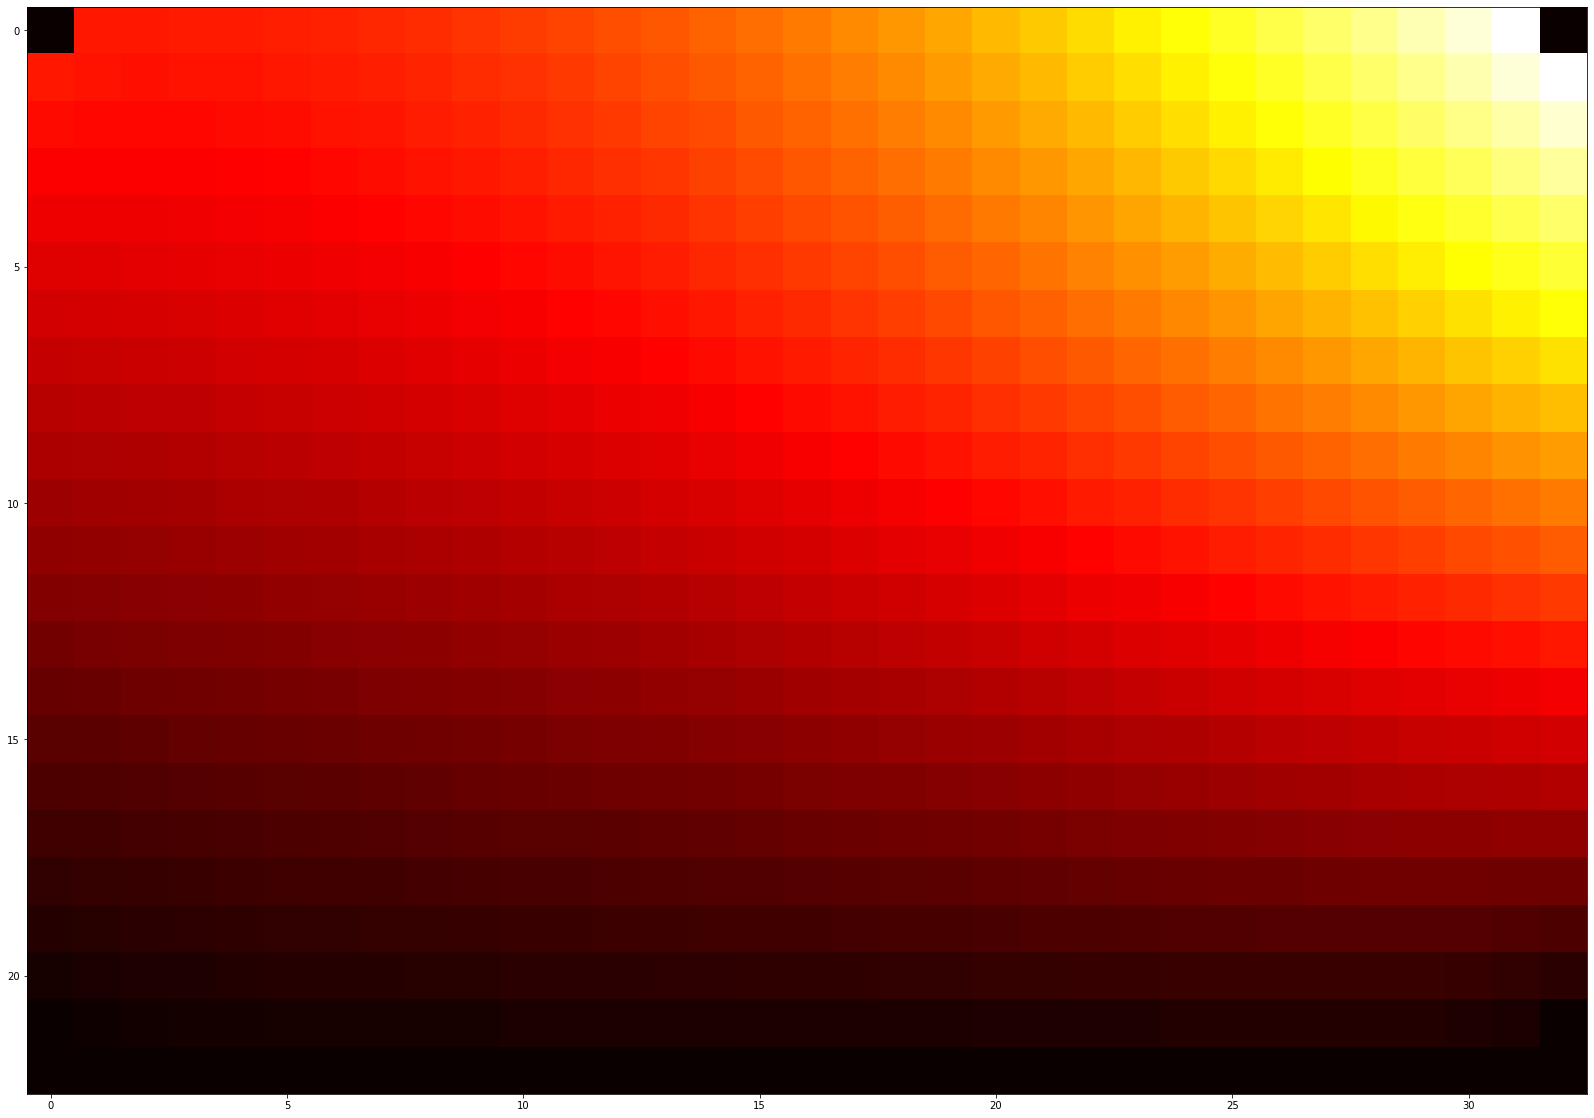

In [33]:
mapCalor = diferenciasFinitas((21,31),up,left,bottom,right,10000)
plt.figure(figsize=(30,20))
plt.imshow(mapCalor, cmap='hot')
plt.show()

In [19]:
a = crearMalla((21,31),up,left,bottom,right)

In [21]:
a[:][0]

array([  0.        , 200.        , 200.33333333, 201.33333333,
       203.        , 205.33333333, 208.33333333, 212.        ,
       216.33333333, 221.33333333, 227.        , 233.33333333,
       240.33333333, 248.        , 256.33333333, 265.33333333,
       275.        , 285.33333333, 296.33333333, 308.        ,
       320.33333333, 333.33333333, 347.        , 361.33333333,
       376.33333333, 392.        , 408.33333333, 425.33333333,
       443.        , 461.33333333, 480.33333333, 500.        ,
         0.        ])

In [26]:
left = []
right = []
for i in range(0,2+1):
    left.append(i*100)
    right.append(i*250)

bottom = []
up  = []
for i in range(0,3+1):
    up.append(200 + (100./3)*(i)**2) 
    bottom.append(0)

print(up)
#print(len(up), len(bottom))

print(left)
print(right)
#print(len(left), len(right))

[200.0, 233.33333333333334, 333.33333333333337, 500.0]
[0, 100, 200]
[0, 250, 500]


In [28]:
a =crearMalla((3,4),up,left,bottom,right)

In [30]:
print(a[0])

[  0.         200.         233.33333333 333.33333333 500.
   0.        ]


In [ ]:
#<font size = 4>
#Tarea-Examen parcial 2

# Métodos Matemáticos Computacionales para Ciencia de Datos#